# Logistic Regression with one predictor

### Import data

In [37]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/resume.csv')
df = df[['received_callback', 'honors']]

### Data structure

In [38]:
df

,received_callback,honors
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4865,0,0
4866,0,0
4867,0,0
4868,0,0


In [39]:
df['received_callback'].value_counts()

0    4478
1     392
Name: received_callback, dtype: int64

In [40]:
df['honors'].value_counts()

0    4613
1     257
Name: honors, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   received_callback  4870 non-null   int64
 1   honors             4870 non-null   int64
dtypes: int64(2)
memory usage: 76.2 KB


### Variable lists

In [42]:
# define outcome variable as y_label
y_label = 'received_callback'

# select features
features = 'honors'

# create feature data
X = df[[features]]

# create response
y = df[y_label]

### Data split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Model

### Select model

[LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) is an estimator that has built-in cross-validation capabilities to automatically select the best hyper-parameters.

In [63]:
from sklearn.linear_model import LogisticRegressionCV

In [71]:
clf = LogisticRegressionCV(cv=5, random_state=0)

### Training

In [72]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=0)

In [66]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(cv=5, random_state=0)>

In [67]:
clf.score(X_train, y_train)

0.9190378410090936

### Coefficients

In [68]:
clf.intercept_

array([-2.42940136])

In [69]:
clf.coef_

array([[0.00130604]])

### Evaluation on test set

In [70]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.920602327173169

### Confusion matrix

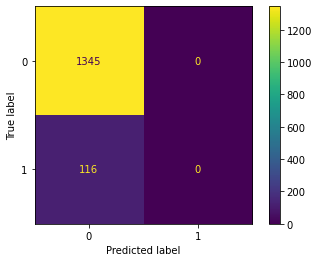

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Classification report

In [73]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes'], zero_division=0))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      1345
         Yes       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461



*Note that recall is also sometimes called sensitivity or true positive rate.*

In a binary classification, we are mainly interested in the results for the category we want to predict. In our case, these are the results for the label 'Yes'.  

More measures:

- ``macro``: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

- ``weighted``: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance.

Interpretation:

* High scores for both *precision* and *recall* show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

* The importance of precision vs recall depends on the use case at hand (and the costs associated with missclassification). 

* A system with *high recall* but *low precision* returns many results, but most of its predicted labels are incorrect when compared to the training labels. 

* A system with *high precision* but *low recall* is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. 
  
* An ideal system with high precision and high recall will return many results, with most results labeled correctly. 

### ROC Curve

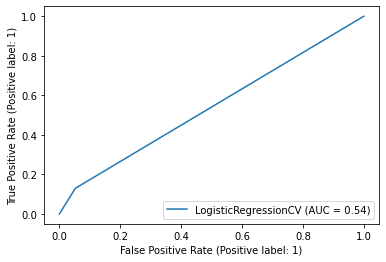

In [55]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test);

### AUC Score

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_test, clf.decision_function(X_test))

0.5386328675810794

Option 2 to obtain AUC:

In [74]:
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.5386328675810794

### Change threshold

Logistic regression returns a probability. You can use the returned probability "as is" (for example, the probability that the person will receive a callback is 0.8) or convert the returned probability to a binary value (for example, this person will receive a callback, therefore we label him as "Yes").

A logistic regression model that returns 0.9 for a particular person is predicting that it is very likely that the person will receive a callback. In order to map a logistic regression value to a binary category (e.g., "Yes" or "No"), you must define a **classification threshold** (also called the decision threshold).

- A value above that threshold indicates "Yes", the person will get a callback
- A value below indicates "No", the person will not receive a callback 

Notice that the optimal classification threshold is problem-dependent and therefore a value that you must optimize (see [Google developers](https://developers.google.com/machine-learning/crash-course/classification/thresholding)).

In our example, we just demonstrate the process for one threshold. 

Use specific threshold

In [75]:
# obtain probabilities
pred_proba = clf.predict_proba(X_test)

In [76]:
# set threshold to 0.25
df_25 = pd.DataFrame({'y_pred': pred_proba[:,1] > .25})

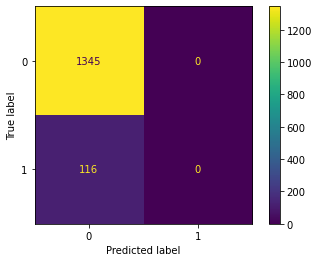

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, df_25['y_pred']);

### Classification report

In [78]:
print(classification_report(y_test, df_25['y_pred'], target_names=['No', 'Yes'], zero_division=0))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96      1345
         Yes       0.00      0.00      0.00       116

    accuracy                           0.92      1461
   macro avg       0.46      0.50      0.48      1461
weighted avg       0.85      0.92      0.88      1461

